In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import infestation_main

# 1. Running and Visualizing One Simulation

In [2]:
months_run = 15
run_mode = 'Baseline'
simulation_df = infestation_main(run_mode, months_run) # Change this to change the number of months
# print(type(simulation_df))
simulation_df

,County,month 0,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,month 13,month 14,month 15
0,Cook,0.1,0.193670,0.240907,0.403604,0.920453,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,DuPage,0.0,0.018739,0.046336,0.227829,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,Kane,0.3,0.316364,0.295714,0.328426,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,Will,0.0,0.123246,0.172343,0.222189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
4,Winnebago,0.0,0.062931,0.335101,0.455289,0.996797,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000014,0.000000,0.018751,0.047045,0.107521,0.162568,0.728155,1.000000,1.000000,0.927238,1.000000,1.000000,1.000000,1.000000,1.0
98,Calhoun,0.0,0.007357,0.018399,0.004495,0.130815,0.056672,0.431324,0.090995,0.631047,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
99,Schuyler,0.0,0.000000,0.000617,0.003660,0.017104,0.060633,0.149209,0.366268,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
100,Gallatin,0.0,0.000000,0.000001,0.002700,0.005141,0.011450,0.019841,0.000000,0.061397,0.268386,0.365158,0.573276,0.868318,1.000000,1.000000,1.0


In [3]:
def make_visual_df(simulation_df):
    visual_df = simulation_df.T
    visual_df.columns = visual_df.iloc[0]
    visual_df = visual_df.drop(visual_df.index[0])
    return visual_df

visual_df = make_visual_df(simulation_df)
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
month 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month 1,0.19367,0.018739,0.316364,0.123246,0.062931,0.058446,0.035815,0.0,0.066872,0.522877,...,0.010221,0.006052,0.000603,0.0,0.002183,0.000014,0.007357,0.0,0.0,0.0
month 2,0.240907,0.046336,0.295714,0.172343,0.335101,0.104934,0.194149,0.03248,0.147577,0.540598,...,0.016277,0.029091,0.009266,0.0,0.005548,0.0,0.018399,0.000617,0.000001,0.000001
month 3,0.403604,0.227829,0.328426,0.222189,0.455289,0.223671,0.333905,0.157309,0.177459,0.597805,...,0.0,0.065645,0.061261,0.004104,0.029929,0.018751,0.004495,0.00366,0.0027,0.000003
month 4,0.920453,1.0,1.0,1.0,0.996797,1.0,1.0,0.234751,1.0,0.645667,...,0.083297,0.257335,0.089612,0.005612,0.075635,0.047045,0.130815,0.017104,0.005141,0.000055
month 5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.242912,1.0,0.682777,...,0.010229,0.386443,0.096524,0.014266,0.077955,0.107521,0.056672,0.060633,0.01145,0.000344
month 6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.204951,1.0,0.808053,...,0.24662,1.0,0.54168,0.030709,0.244769,0.162568,0.431324,0.149209,0.019841,0.0
month 7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.19521,1.0,1.0,...,0.143449,1.0,0.763303,0.091834,0.291296,0.728155,0.090995,0.366268,0.0,0.0
month 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.469014,1.0,1.0,...,0.584501,1.0,1.0,0.254016,1.0,1.0,0.631047,1.0,0.061397,0.002498
month 9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.898179,1.0,1.0,...,1.0,1.0,1.0,0.370804,1.0,1.0,1.0,1.0,0.268386,0.00797


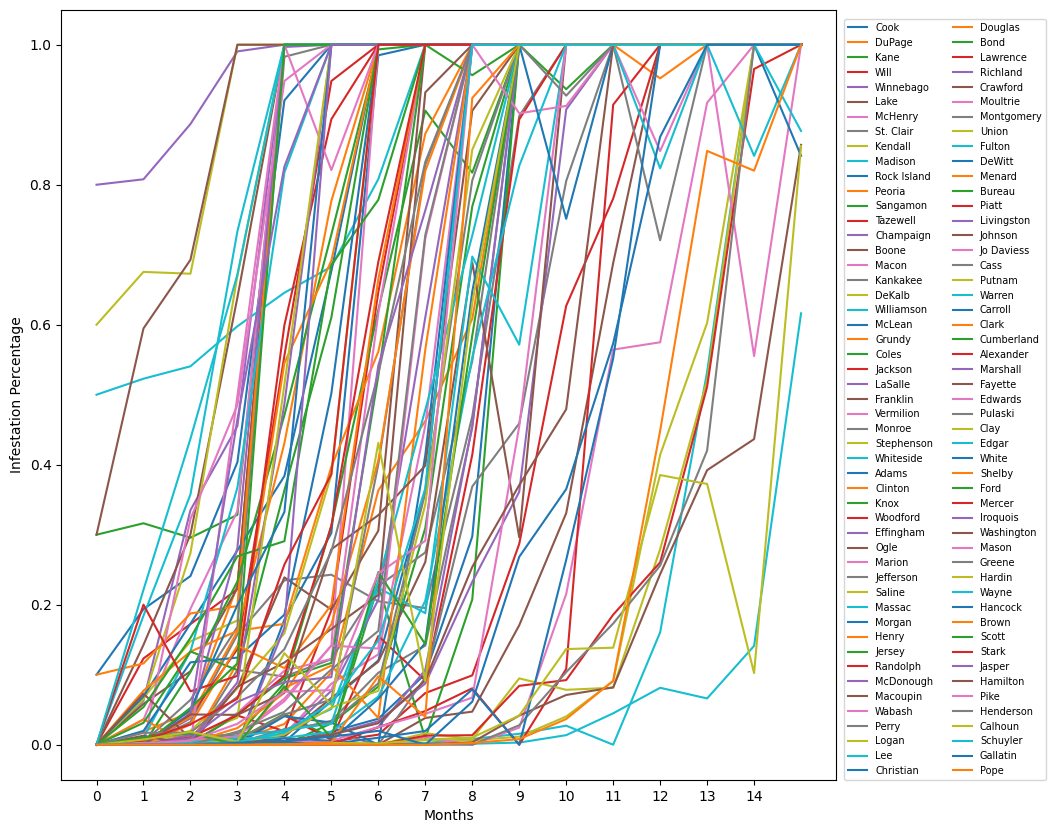

In [4]:
plt.figure(figsize=(10,10))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.xticks(ticks=range(0, 15),
    labels=range(0, 15))
plt.xlabel('Months')
plt.ylabel('Infestation Percentage')
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=7, ncol=2)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [27]:
def make_network_heat(month):
    month = f'month {month}'
#     min_value = simulation_df[month].min()
#     max_value = simulation_df[month].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, month].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)
        
    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')
    
    edge_colors = ['gray' if CG[src][tgt]['rel'] == 'interstate' else 'gray' for src, tgt in CG.edges()]
    edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
    nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [28]:
widgets.interact(make_network_heat,
    month=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='month', layout=Layout(width='800px'), max=15), Output())…

<function __main__.make_network_heat(month)>

In [29]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    month=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='month', interval=500, max=15), Output()), _dom_classes=('widg…

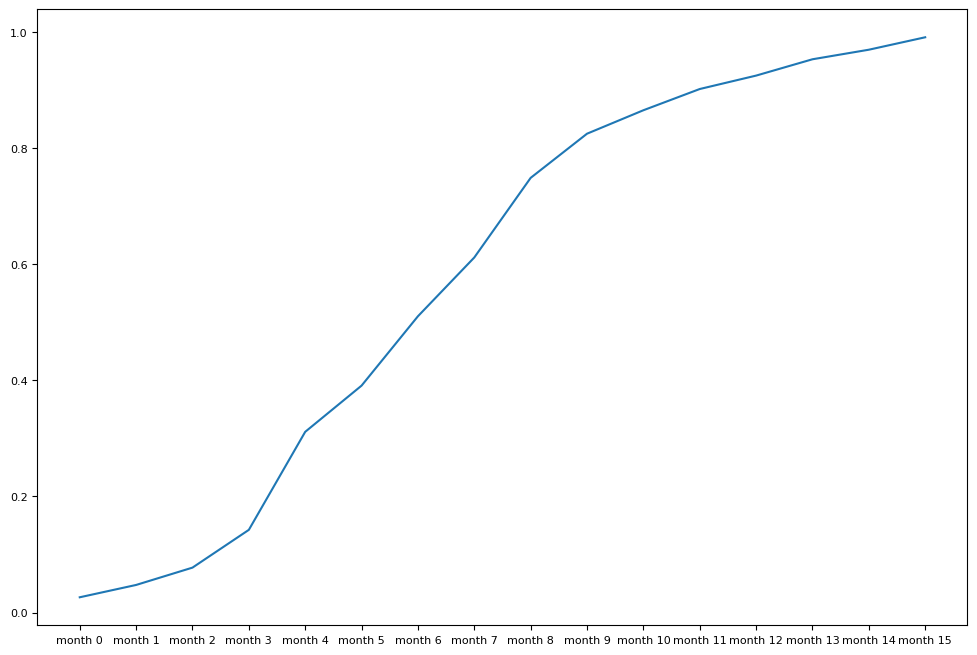

In [9]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

# Running the Simulation as a Monte Carlo and Plotting the Results

In [10]:
def make_average_graphs(df, sim_months):
    vis_df = make_visual_df(df)
    avg_df = vis_df.mean(axis=1)
    plt.xticks(ticks=range(0, sim_months+1),
            labels=range(0, sim_months+1))
    plt.xlabel('Months')
    plt.ylabel('Infestation Percentage')
    plt.plot(avg_df.index, avg_df, linewidth=0.5)

In [11]:
def model_variables(run_mode, sims_run, sim_months):
    plt.figure(figsize=(12,8))
    plt.tick_params(labelsize=8)
    
    for i in range(0, sims_run):
        df = infestation_main(run_mode, sim_months)
        make_average_graphs(df, sim_months)
    plt.grid()
    plt.show()

In [12]:
widgets.interact(model_variables,
    run_mode =['Baseline', 'Poison ToH', 'Population-Based Countermeasures', 'Quarantine'],
    sims_run = (10, 100, 10),
    sim_months = (1, 30, 1),
    value='Baseline',
    disabled=False,

)

interactive(children=(Dropdown(description='run_mode', options=('Baseline', 'Poison ToH', 'Population-Based Co…

<function __main__.model_variables(run_mode, sims_run, sim_months)>

# Model Variables

In [13]:
sims_run = 100  # RIP my RAM
sim_months = 30

all_trends = {}

def model_variables_avg(run_mode, sims_run, sim_months, all_trends):
    plt.figure(figsize=(12, 8))
    plt.title(f'{run_mode} Infestation Model')
    plt.tick_params(labelsize=8)
    all_avg_lines = []
    
    for i in range(sims_run):
        df = infestation_main(run_mode, sim_months)
        make_average_graphs(df, sim_months)
        
        vis_df = make_visual_df(df)
        avg_df = vis_df.mean(axis=1)
        all_avg_lines.append(avg_df.values)
    plt.grid()
    if all_avg_lines:
        overall_avg = pd.DataFrame(all_avg_lines).mean()
        plt.plot(overall_avg.index, overall_avg, 'k-', linewidth=3)  # Plotting the overall trend line
    all_trends[run_mode] = overall_avg
    plt.xticks(ticks=range(0, sim_months+1),
                labels=range(0, sim_months+1))
    plt.xlabel('Months')
    plt.ylabel('Infestation Percentage')
    plt.show()
    return all_trends

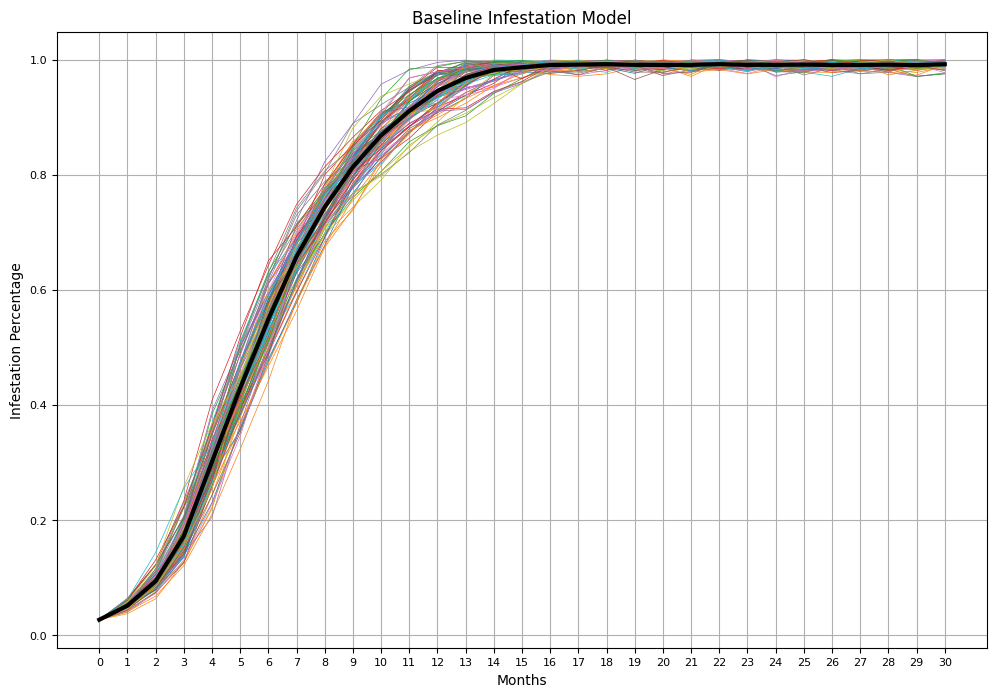

In [14]:
all_trends = model_variables_avg('Baseline', sims_run, sim_months, all_trends)

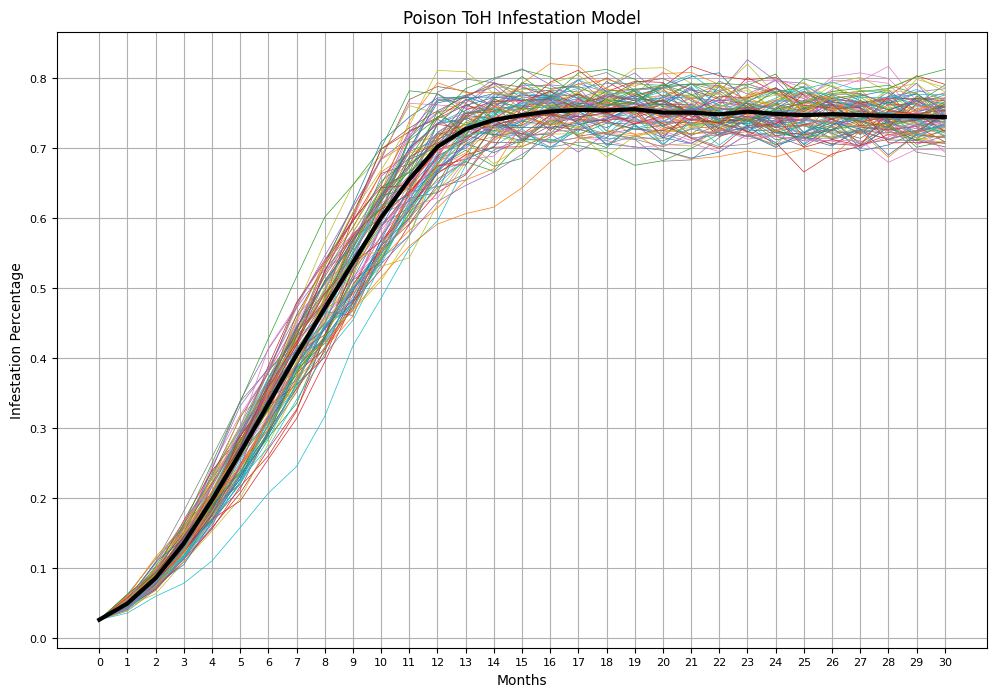

In [15]:
all_trends = model_variables_avg('Poison ToH', sims_run, sim_months, all_trends)

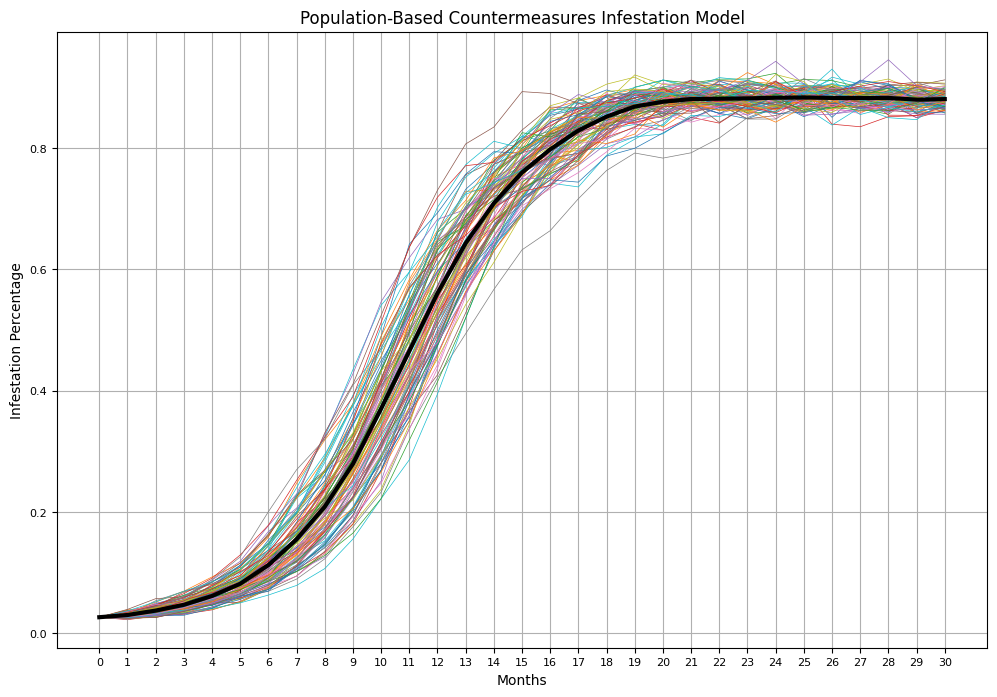

In [16]:
all_trends = model_variables_avg('Population-Based Countermeasures', sims_run, sim_months, all_trends)

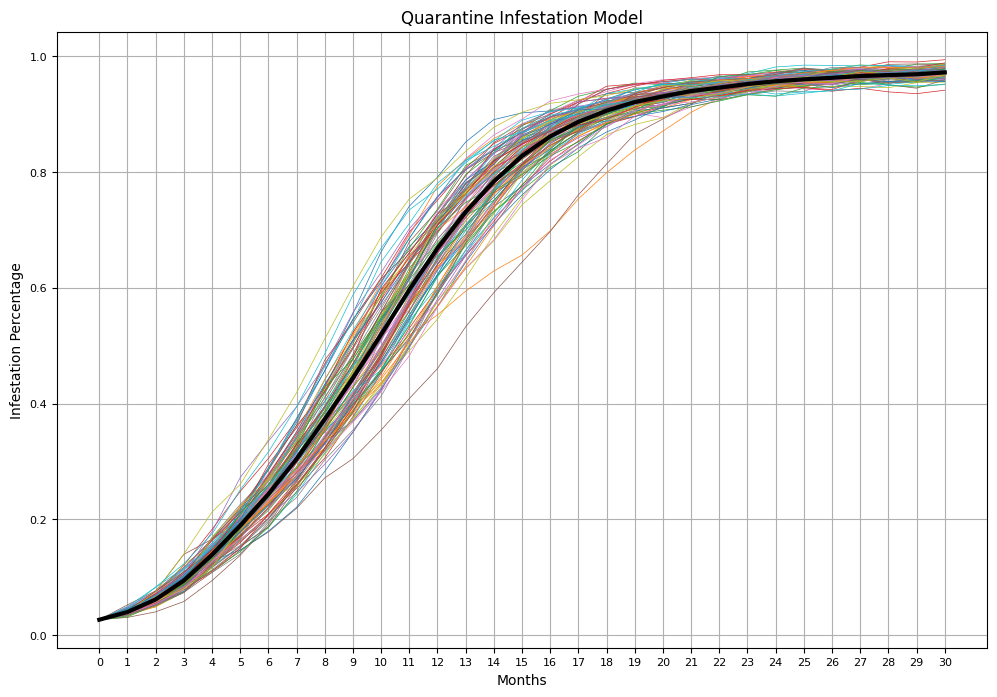

In [17]:
all_trends = model_variables_avg('Quarantine', sims_run, sim_months, all_trends)

# Show All Trend Lines

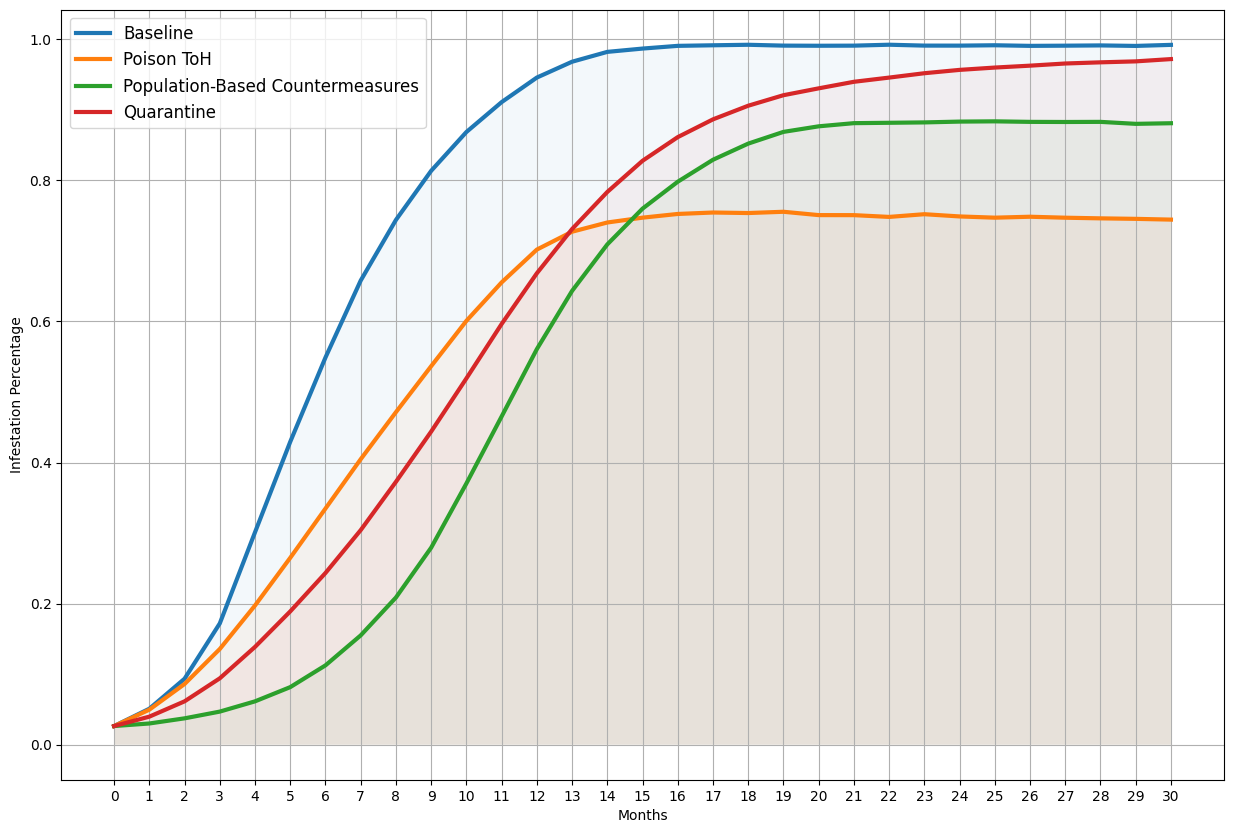

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.xticks(ticks=range(0, sim_months+1),
            labels=range(0, sim_months+1))
plt.xlabel('Months')
plt.ylabel('Infestation Percentage')

for model in all_trends:
    trend_sr = all_trends[model]
    X = trend_sr.index.tolist()
    Y = trend_sr.values.tolist()
    
    ax.plot(X, Y, label=model, linewidth=3)
    ax.fill_between(X, Y, 0, alpha=0.05, interpolate=True)

plt.grid()
plt.legend(fontsize=12)
plt.show()